In [1]:
from donut import cruller
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pylab import savefig
%matplotlib inline

In [2]:
def ElliotFunction(x):
    s=0.5
    return (0.5*s*x)/(1+s*abs(x)) + 0.5

In [3]:
class node:
    def __init__(self,x,y,index):
        self.x = x
        self.y = y
        self.index = index
        self.inList = []
        self.activation = 0
        
    def setX(self,x):
        self.x = x
    def getX(self):
        return (self.x)
    
    def setY(self,y):
        self.y = y
    def getY(self):
        return (self.y)
    
    def setIndex(self, index):
        self.index = index
    def getIndex(self):
        return self.index
    
    def setAct(self,act):
        self.activation = ElliotFunction(act)
    def setBias(self):
        self.activation = 1.0
    def getAct(self):
        return self.activation
    
    def addInput(self,connect):
        self.inList.append(connect)
    def getInputs(self):
        return self.inList

In [4]:
class connection:
    def __init__(self,startN,endN,weight,rad):
        self.startN = startN
        self.endN = endN
        self.weight = weight
        self.rad = rad
        self.x1 = startN.getX()
        self.x2 = endN.getX()
        self.y1 = startN.getY()
        self.y2 = endN.getY()
        
    def drawX1(self):
        return self.x1 + self.rad*math.cos(math.atan2(self.y2-self.y1,self.x2-self.x1))
    def drawY1(self):
        return self.y1 + self.rad*math.sin(math.atan2(self.y2-self.y1,self.x2-self.x1))
    def drawX2(self):
        return self.x2 - self.rad*math.cos(math.atan2(self.y2-self.y1,self.x2-self.x1))
    def drawY2(self):
        return self.y2 - self.rad*math.sin(math.atan2(self.y2-self.y1,self.x2-self.x1))
        
    def setWeight(self,weight):
        self.weight = weight
    def getWeight(self):
        return self.weight
    def getInputValue(self):
        return self.weight*self.startN.getAct()

In [5]:
#Utility functions

def getLayer(i,nn_struct):
    cumSum, iter = nn_struct[0],0
    while(i >= cumSum):
        cumSum+=nn_struct[iter+1]
        iter+=1
    return iter

def cumList(nn_struct):
    clist = []
    cum = 0
    for n in nn_struct:
        cum+=n
        clist.append(cum)
    return clist

In [17]:
#Accepts a list as input that containes the number of nodes in each layer
#starting with the input and ending with the output layer.  The bias unit
#must also be included 

def DrawNN(nn_struct, weight_list, input_list):
    if(len(input_list) != (nn_struct[0]-1)):
        print("\nTHE NUMBER OF INPUTS DOESN'T MATCH THE NUMBER OF INPUT NEURONS\n")
        return
    
    nLayers = len(nn_struct)
    #the partition of the node indices by layer
    lPart = cumList(nn_struct) 

    #plotting parameters
    xDim, yDim = 18,10
    plt.figure(figsize=(xDim,yDim))
    xDist = xDim/(nLayers-1)
    yDist = yDim/(max(nn_struct)+1)
    rad = yDist/4
    plt.axes()
    
    #create all of the nodes in the nn
    nodes = []
    i = 0
    for layer in range(len(nn_struct)):
        nNodes = nn_struct[layer]
        for n in range(nNodes):
            x = layer*xDist
            y = -(nNodes-1)*0.5*yDist + n*yDist
            newnode = node(x,y,i)
            if n == nNodes -1:
                newnode.setBias()
            nodes.append(newnode)
            i+=1
                
    #create all of the connections in the nn
    connects = []
    i = 0
    for nIter in nodes:
        layer = getLayer(nIter.index,nn_struct)
        if layer == nLayers-1:
            break
        #find the index of the nodes to connect the current node to
        nlStart = lPart[layer]
        nlEnd = lPart[layer] + nn_struct[layer+1] - 1 
        if layer == len(nn_struct)-2:
            nlEnd+=1
        #make connections
        for cIter in range(nlStart,nlEnd):
            conn = connection(nIter,nodes[cIter],weight_list[i],rad)
            connects.append(conn)
            nodes[cIter].addInput(conn)
            i+=1
            
    print("n connects = ", len(connects))
    #calculate the activation values for each node
    i=0
    for nIter in nodes:
        if nIter.index < nn_struct[0]-2:
            nIter.setAct(input_list[i])
            i+=1
        else:
            #add up the weights and activations and set the activation value for the current node
            nIter.setAct(sum([cn.getInputValue() for cn in nIter.getInputs()]))
            
    #draw nodes      
    for nd in nodes:
        #nfc = math.erf(0.5*nd.getAct())
        nfc = nd.getAct()
        circle = plt.Circle((nd.getX(),nd.getY()),radius=rad,fc=str(nfc),lw=2)
        plt.gca().add_patch(circle)
    
    #draw connections
    for cn in connects:
        #clw=-1/(10*math.log10(cn.getWeight()))
        clw = 1+2*math.erf(2*cn.getWeight()-1)
        plt.arrow(cn.drawX1(),cn.drawY1(),cn.drawX2()-cn.drawX1(),cn.drawY2()-cn.drawY1(),
                  length_includes_head=True,lw=clw,aa=True,head_width=0.1,fc='black')
    
    plt.gca().set_xlim(-xDist/4,xDim+xDist/4)
    plt.gca().set_ylim(-yDim/2,yDim/2)
    plt.show()
    

[9.900466006315698, 2.728070498713169, 5.465239874716275]
n connects =  23


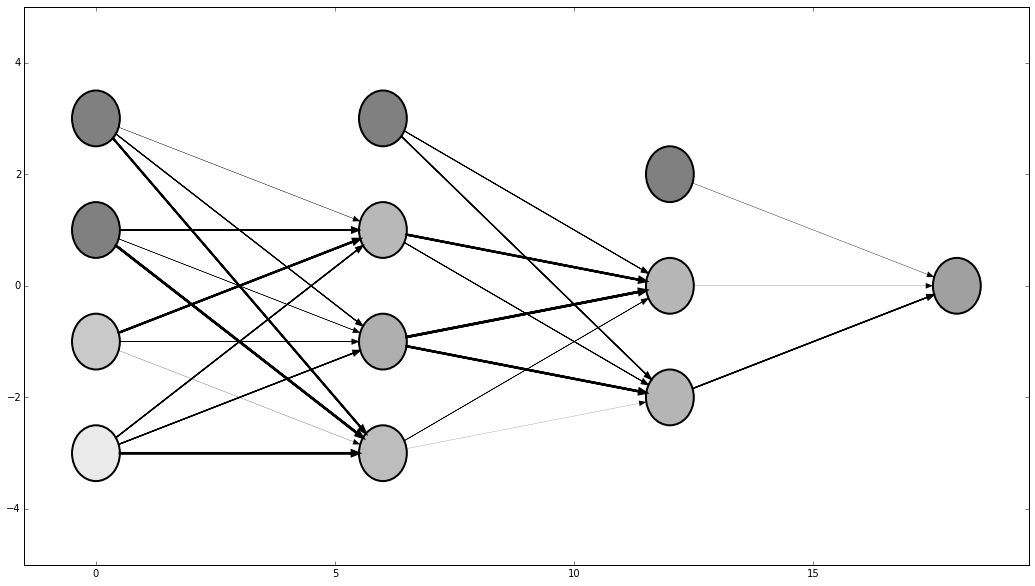

In [18]:
from random import random
nn_str = [4,4,3,1]
nConnects = 0
for i in range(1,len(nn_str)-1):
    nConnects += nn_str[i-1]*(nn_str[i]-1)
nConnects += nn_str[-2]*nn_str[-1]

connects = [random() for n in range(nConnects)]
inputs = [10-20*random() for n in range(nn_str[0]-1)]

#[print("%.2f"%fl) for fl in connects]
print(inputs)
DrawNN(nn_str,connects,inputs)

n connects =  423


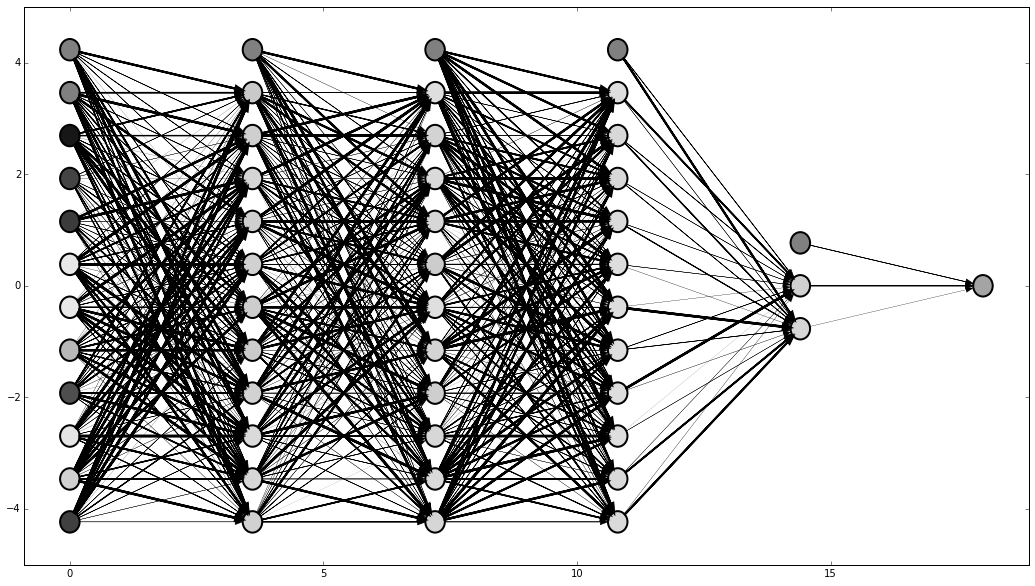

In [20]:
nn_str = [12,12,12,12,3,1]
nConnects = 0
for i in range(1,len(nn_str)):
    nConnects+=nn_str[i-1]*nn_str[i]
connects = [random() for n in range(nConnects)]
inputs = [10-20*random() for n in range(nn_str[0]-1)]

DrawNN(nn_str,connects,inputs)